# Lab 5: LHC Particle Physics Data Analysis

**Author:** Leo Quintana

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Explore LHC particle physics data and optimize discovery significance through event selection

In this lab, you will work with realistic particle physics data from the Large Hadron Collider (LHC). The goal is to identify Higgs boson signals from QCD background noise using jet substructure analysis and cut-based optimization.

## Dataset Information

Two pT (transverse momentum) ranges are provided:

### Low pT (250-500 GeV/c): `Sample_pt_250_500`
- **Training samples:**
  - `higgs_100000_pt_250_500.pkl` (Expected yields: N_higgs = 100)
  - `qcd_100000_pt_250_500.pkl` (Expected yields: N_qcd = 20,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_250_500.h5`
  - `data_lowLumi_pt_250_500.h5`

### High pT (1000-1200 GeV/c): `Sample_pt_1000_1200`
- **Training samples:**
  - `higgs_100000_pt_1000_1200.pkl` (Expected yields: N_higgs = 50)
  - `qcd_100000_pt_1000_1200.pkl` (Expected yields: N_qcd = 2,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_1000_1200.h5`
  - `data_lowLumi_pt_1000_1200.h5`

## Physics Background

### What is a Jet?
A jet is a collection of particles traveling in the same direction, originating from a hard quark or gluon through bremsstrahlung and fragmentation processes.

### Jet Substructure
At high transverse momenta, heavy particles (W, Z, Higgs, top quarks) have collimated decays. Standard jet identification fails because all decay products end up in a single jet. **Jet substructure variables** computed from constituent 4-momenta help distinguish boosted heavy particles with two-pronged decays from QCD jets.

### Key Variables:
- **mass**: Jet invariant mass (GeV)
- **d2**: Jet substructure variable for two-pronged discrimination
- **η (eta)**: Pseudorapidity (geometric quantity related to polar angle)
- **φ (phi)**: Azimuthal angle around the beam

**Extended Reading:** 
- ATLAS detector: https://arxiv.org/pdf/1709.04533.pdf
- Jet substructure: https://arxiv.org/abs/1201.0008

## Setup and Data Loading

In [29]:
# TODO: Import required libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# TODO: Load the QCD background data
# Use pickle to load: Sample_pt_250_500/qcd_100000_pt_250_500.pkl

with open('Sample_pt_250_500/qcd_100000_pt_250_500.pkl', 'rb') as file:
    qcd_data = pickle.load(file)
    qcd_df = pd.DataFrame(qcd_data)
    

In [31]:
# TODO: Load the Higgs signal data
# Use pickle to load: Sample_pt_250_500/higgs_100000_pt_250_500.pkl

with open('Sample_pt_250_500/higgs_100000_pt_250_500.pkl', 'rb') as file:
    higgs_data = pickle.load(file)
    higgs_df = pd.DataFrame(higgs_data)
    


In [32]:
# TODO: Explore the data structure
# Print the keys available in the data dictionary
# Print the first few values of 'mass' and 'd2'

print(f"Our QCD Data Keys: {qcd_df.columns.tolist()}")
print(f"Ourc Higgs Data Keys: {higgs_df.columns.tolist()}")
print(f"The first few QCD mass values: {qcd_df['mass'].head()} and d2 values: {qcd_df['d2'].head()}")
print(f""" The first few QCD mass values:{higgs_df['mass'].head()} and d2 values: {higgs_df['d2'].head()}""")
 

Our QCD Data Keys: ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
Ourc Higgs Data Keys: ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
The first few QCD mass values: 0    125.298720
1     88.047054
2     85.794174
3     42.947328
4     59.542227
Name: mass, dtype: float64 and d2 values: 0    3.304886
1    2.439089
2    4.118371
3    8.038338
4    6.353842
Name: d2, dtype: float64
 The first few QCD mass values:0    125.150365
1    130.552672
2    125.703063
3    126.215853
4    132.182504
Name: mass, dtype: float64 and d2 values: 0    1.298020
1    1.445626
2    0.986597
3    1.218467
4    1.291784
Name: d2, dtype: float64


# Task 1: Visualization (3 points)

Explore the low pT dataset (`Sample_pt_250_500`). Make representative plots of each feature to understand the data structure and characteristics.

## Part (a): Individual Feature Distributions

Create histograms for each available feature in both signal and background datasets.

n_signal/sqrt(n_background)

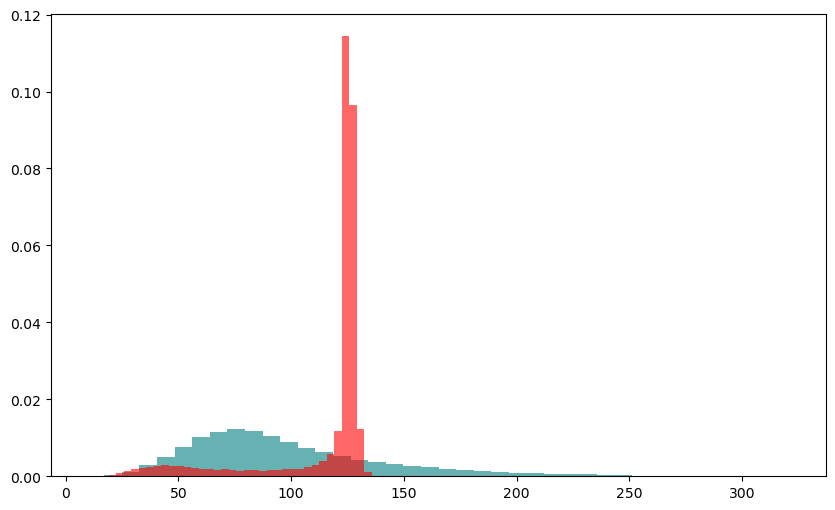

In [33]:
# TODO: Plot mass distributions for signal and background
# Create overlaid histograms with proper labels and legends
fig, ax = plt.subplots(figsize=(10, 6));

ax.hist(qcd_df['mass'], bins=40, alpha=0.6, label='qcd Background', color='teal', density=True);
ax.hist(higgs_df['mass'], bins=40, alpha=0.6, label='Higgs Signal', color='red', density=True);

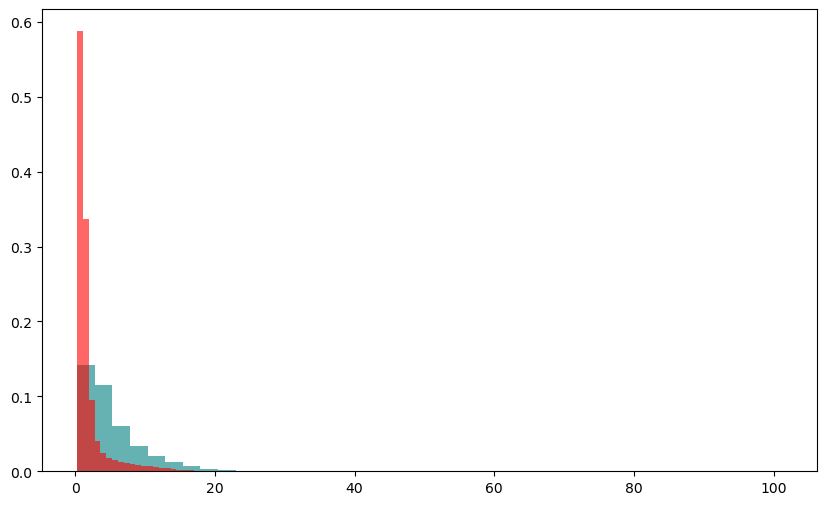

In [34]:
# TODO: Plot d2 distributions for signal and background

fig, ax1 = plt.subplots(figsize=(10, 6));

ax1.hist(qcd_df['d2'], bins=40, alpha=0.6, label='qcd Background', color='teal', density=True);
ax1.hist(higgs_df['d2'], bins=40, alpha=0.6, label='Higgs Signal', color='red', density=True);

['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']


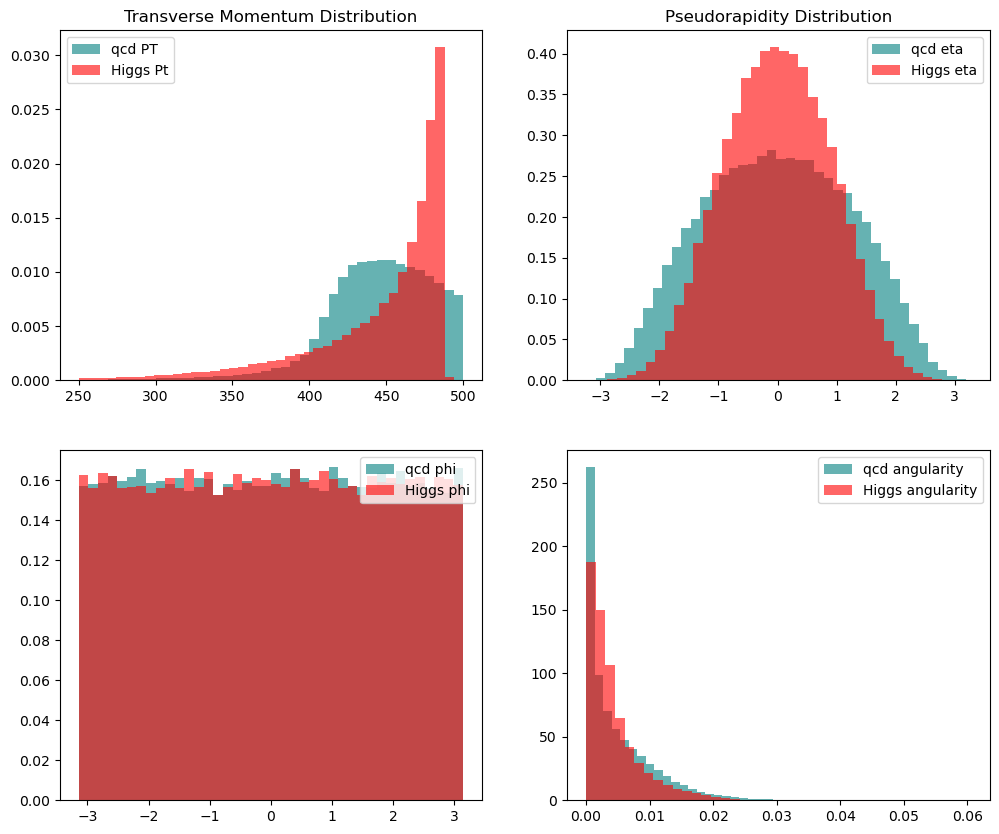

In [35]:
# TODO: Plot other available features (pt, eta, phi, etc.)
# Create a multi-panel figure showing all features

print(qcd_df.columns.tolist())

# Create subplots for variables pt, eta, phi, and angularity
fig, ax2 = plt.subplots(2, 2, figsize=(12, 10));
ax2.flat[0].hist(qcd_df['pt'], bins=40, alpha=0.6, label='qcd PT', color='teal', density=True);
ax2.flat[0].hist(higgs_df['pt'], bins=40, alpha=0.6, label='Higgs Pt', color='red', density=True);
ax2.flat[0].set_title('Transverse Momentum Distribution');
ax2.flat[0].legend();

ax2.flat[1].hist(qcd_df['eta'], bins=40, alpha=0.6, label='qcd eta', color='teal', density=True);
ax2.flat[1].hist(higgs_df['eta'], bins=40, alpha=0.6, label='Higgs eta', color='red', density=True);
ax2.flat[1].set_title('Pseudorapidity Distribution'); 
ax2.flat[1].legend();

ax2.flat[2].hist(qcd_df['phi'], bins=40, alpha=0.6, label='qcd phi', color='teal', density=True);
ax2.flat[2].hist(higgs_df['phi'], bins=40, alpha=0.6, label='Higgs phi', color='red', density=True);
ax2.flat[2].legend();

ax2.flat[3].hist(qcd_df['angularity'], bins=40, alpha=0.6, label='qcd angularity', color='teal', density=True);
ax2.flat[3].hist(higgs_df['angularity'], bins=40, alpha=0.6, label='Higgs angularity', color='red', density=True);
ax2.flat[3].legend();




## Part (b): Summary Statistics

Calculate and display basic statistics for key features.

In [36]:
# TODO: Calculate mean, std, min, max for mass and d2

print(f"""
QCD Mass Mean: {qcd_df['mass'].mean():.3f}, 
QCD Mass Std: {qcd_df['mass'].std():.3f}, 
QCD Mass Min: {qcd_df['mass'].min():.3f}, 
QCD Mass Max: {qcd_df['mass'].max():.3f} 
""")

print(f"""
Higgs Mass Mean: {higgs_df['d2'].mean():.3f}, 
Higgs Mass Std: {higgs_df['d2'].std():.3f}, 
Higgs Mass Min: {higgs_df['d2'].min():.3f}, 
Higgs Mass Max: {higgs_df['d2'].max():.3f} 
""")

print(f"""
QCD D2 Mean: {qcd_df['d2'].mean():.3f}, 
QCD D2 Std: {qcd_df['d2'].std():.3f}, 
QCD D2 Min: {qcd_df['d2'].min():.3f}, 
QCD D2 Max: {qcd_df['d2'].max():.3f} 
""")

print(f"""
Higgs D2 Mean: {higgs_df['d2'].mean():.3f}, 
Higgs D2 Std: {higgs_df['d2'].std():.3f}, 
Higgs D2 Min: {higgs_df['d2'].min():.3f}, 
Higgs D2 Max: {higgs_df['d2'].max():.3f} 
""")



QCD Mass Mean: 97.738, 
QCD Mass Std: 43.493, 
QCD Mass Min: 9.293, 
QCD Mass Max: 321.398 


Higgs Mass Mean: 1.967, 
Higgs Mass Std: 2.501, 
Higgs Mass Min: 0.275, 
Higgs Mass Max: 33.723 


QCD D2 Mean: 5.209, 
QCD D2 Std: 4.285, 
QCD D2 Min: 0.281, 
QCD D2 Max: 101.157 


Higgs D2 Mean: 1.967, 
Higgs D2 Std: 2.501, 
Higgs D2 Min: 0.275, 
Higgs D2 Max: 33.723 



# Task 2: Data Exploration (3 points)

Study correlations between mass and d2 jet substructure variable to build a cut-based analysis.

## Part (a): Distribution Comparison and 2D Scatter Plots

Create mass and d2 distributions, and 2D scatter plots for signal (```'Higgs Signal'```) and background (```'QCD Background'```).

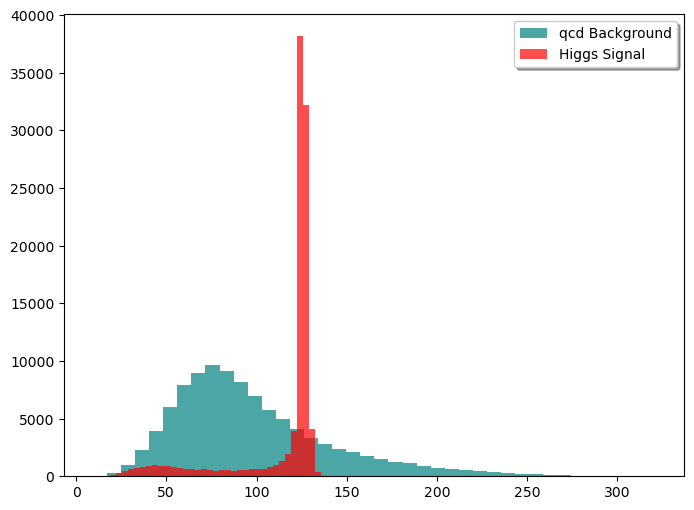

In [37]:
# TODO: Create two plots showing mass distributions (signal vs background)
# Describe the shape and discrimination power

# y axis is counts higgs should only reach 10 000

fig, ax3 = plt.subplots(figsize=(8, 6));
ax3.hist(qcd_df['mass'], bins=40, alpha=0.7, label='qcd Background', color='teal', density=False);
ax3.hist(higgs_df['mass'], bins=40, alpha=0.7, label='Higgs Signal', color='red', density=False);
ax3.legend(shadow=True);

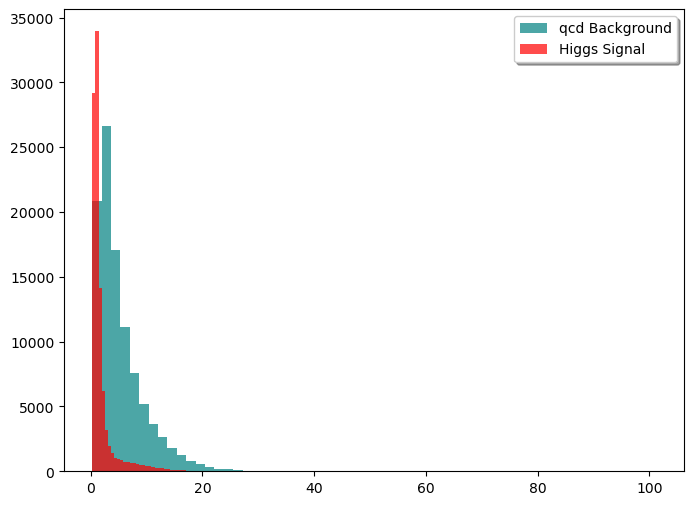

In [38]:
# TODO: Create two plots showing d2 distributions (signal vs background)
# Describe the shape and discrimination power

fig, ax4 = plt.subplots(figsize=(8, 6));
ax4.hist(qcd_df['d2'], bins=60, alpha=0.7, label='qcd Background', color='teal', density =False);
ax4.hist(higgs_df['d2'], bins=60, alpha=0.7, label='Higgs Signal', color='red',density =False);
ax4.legend(shadow=True);

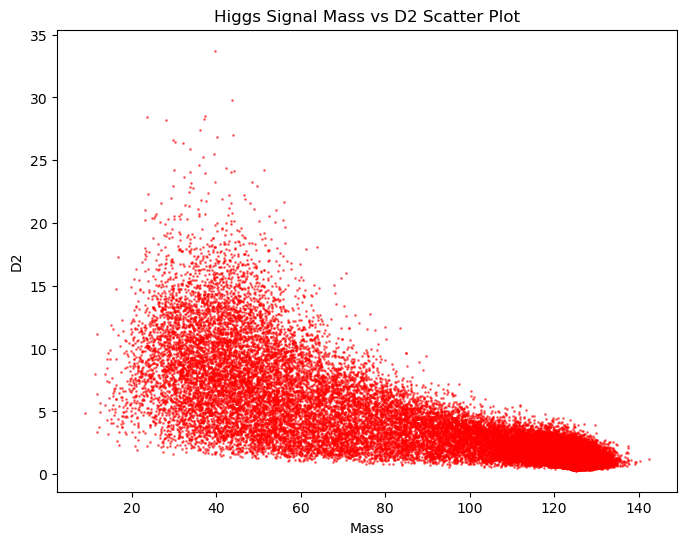

In [39]:
# TODO: Create 2D scatter plot of mass vs d2 for signal


fig, ax5 = plt.subplots(figsize=(8, 6));
ax5.scatter(higgs_df['mass'], higgs_df['d2'], alpha=0.5, label='qcd Background', color='red', s=1);    
ax5.set_title('Higgs Signal Mass vs D2 Scatter Plot');
ax5.set_xlabel('Mass');
ax5.set_ylabel('D2');

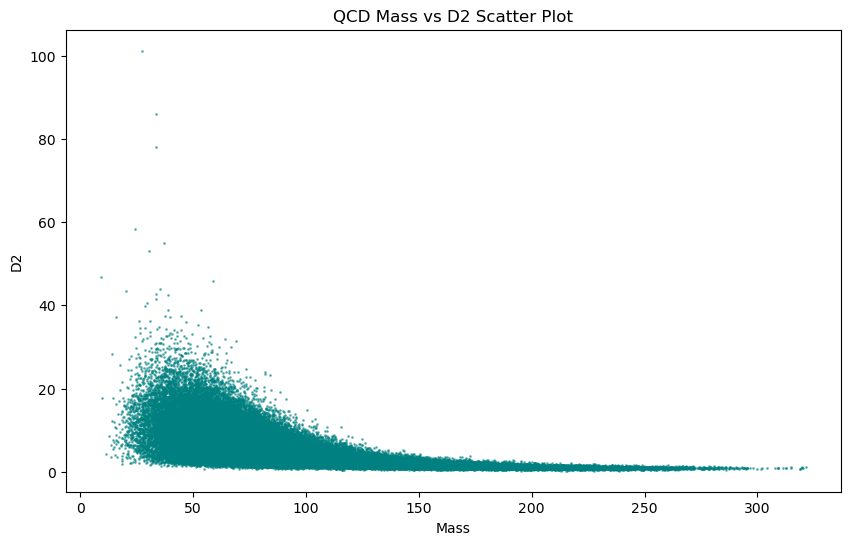

In [40]:
# TODO: Create 2D scatter plot of mass vs d2 for background

fig, ax6 = plt.subplots(figsize=(10, 6));
ax6.scatter(qcd_df['mass'], qcd_df['d2'], alpha=0.5, label='qcd Background', color='teal', s=1);    
ax6.set_title('QCD Mass vs D2 Scatter Plot');
ax6.set_xlabel('Mass');
ax6.set_ylabel('D2');

**Question:** Describe the discrimination power of mass and d2 for separating signal from background.

**Your Answer:** 

## Part (b): Weighted Distributions

Re-weight signal (N_signal = 100) and background (N_background = 20,000) to match expected yields.

In [41]:
# TODO: Calculate weights for signal and background
# N_signal_expected = 100, N_background_expected = 20000

N_signal_expected = 100
N_background_expected = 20000
higgs_df['weight'] = N_signal_expected / len(higgs_df)
qcd_df['weight'] = N_background_expected / len(qcd_df)


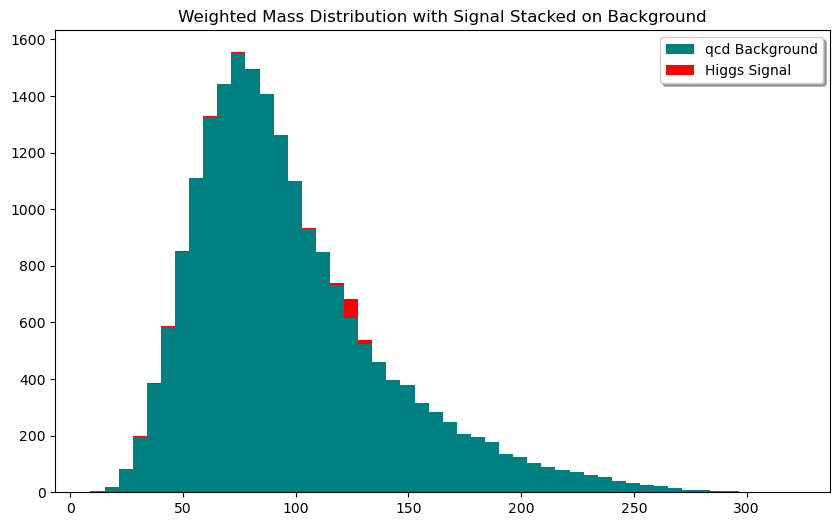

In [42]:
# TODO: Create weighted histograms with signal stacked on background for mass
# Use plt.hist with weights parameter and stacked=True

fig, ax7 = plt.subplots(figsize=(10, 6));
ax7.hist([qcd_df['mass'], higgs_df['mass']], bins=50, weights=[qcd_df['weight'], higgs_df['weight']], 
         label=['qcd Background', 'Higgs Signal'], color=['teal', 'red'], stacked=True);
ax7.legend(shadow=True);
ax7.set_title('Weighted Mass Distribution with Signal Stacked on Background');

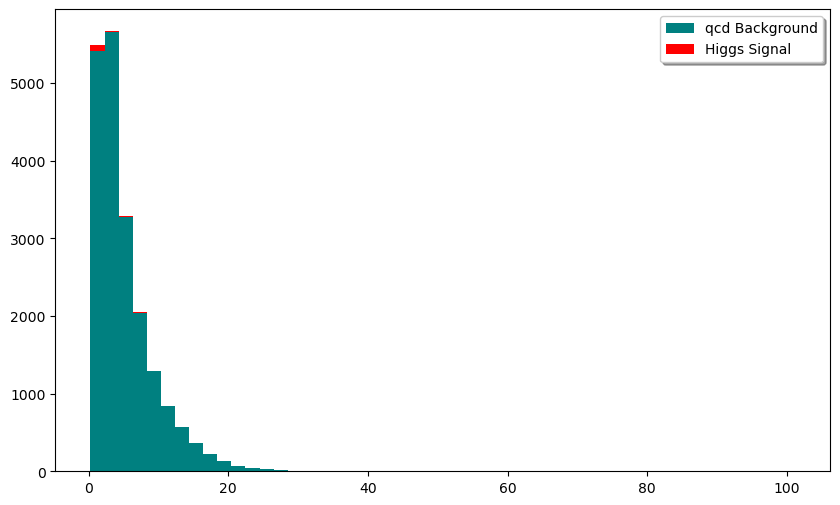

In [43]:
# TODO: Create weighted histograms with signal stacked on background for mass and d2

fig, ax8 = plt.subplots(figsize=(10, 6));
ax8.hist([qcd_df['d2'], higgs_df['d2']], bins=50, weights=[qcd_df['weight'], higgs_df['weight']], 
         label=['qcd Background', 'Higgs Signal'], color=['teal', 'red'], stacked=True);
ax8.legend(shadow=True);

**Question:** Describe the visibility of observing the signal over the background.

**Your Answer:** The background covers the higgs signal almost completely so the visibility is not great.

## Part (c): Mass Window Selection

Apply a mass cut of [120, 130] GeV to enhance signal visibility.

In [44]:
# TODO: Apply mass cut [120, 130] GeV
# Create boolean masks for signal and background

higgs_mask = (higgs_df['mass'] >= 120) & (higgs_df['mass'] <= 130)
higgs_cut = higgs_df[higgs_mask]

qcd_mask = (qcd_df['mass'] >= 120) & (qcd_df['mass'] <= 130)
qcd_cut = qcd_df[qcd_mask]


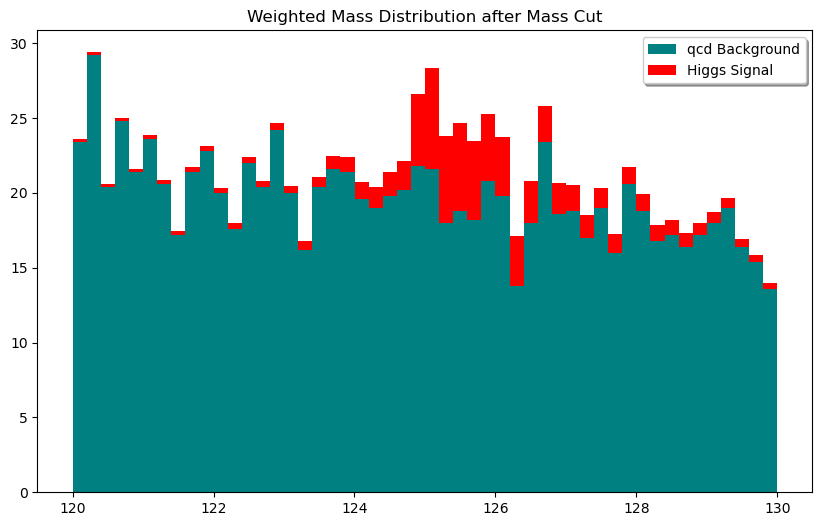

In [45]:
# TODO: Plot weighted mass distributions after the cut
# Does the mass distribution look as expected?


fig, ax9 = plt.subplots(figsize=(10, 6));
ax9.hist([qcd_cut['mass'], higgs_cut['mass']], bins=50, weights=[qcd_cut['weight'], higgs_cut['weight']], 
         label=['qcd Background', 'Higgs Signal'], color=['teal', 'red'], stacked=True);
ax9.legend(shadow=True);
ax9.set_title('Weighted Mass Distribution after Mass Cut');

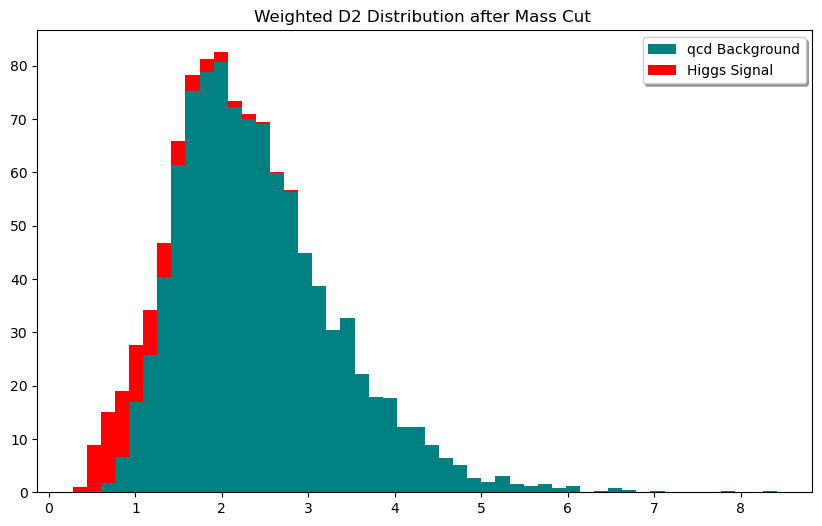

In [46]:
# TODO: Plot weighted d2 distributions after the mass cut
# How does this compare to d2 without any cuts?

fig, ax10 = plt.subplots(figsize=(10, 6));
ax10.hist([qcd_cut['d2'], higgs_cut['d2']], bins=50, weights=[qcd_cut['weight'], higgs_cut['weight']], 
         label=['qcd Background', 'Higgs Signal'], color=['teal', 'red'], stacked=True);
ax10.legend(shadow=True);
ax10.set_title('Weighted D2 Distribution after Mass Cut ');


**Question:** How does the d2 plot after mass cut compare to the one without cuts?

**Your Answer:** There is more more visibility in the d2 histograms now with the mass cuts compared to before because we chose the section where there was the most singal visibility from our original plot.

# Task 3: Significance Optimization (4 points)

Scan over d2 values to find the optimal cut that maximizes discovery significance.

**Significance Formula:** $\text{Significance} = \frac{N_{\text{signal}}}{\sqrt{N_{\text{background}}}}$ (in units of σ)

The goal is to reject as much background as possible while keeping signal to make it more significant.

## Part (a): Understanding d2 Cuts

Inspect the d2 distribution after mass cut to determine the appropriate cut direction.

**Questions to consider:**
1. How does d2 distribution change after applying the mass cut?
2. For a d2 cut value of 4, should you keep events below or above 4?
3. What range should be used to scan d2 cut values?

**Your Answers:**
1. We see a lot more of the higgs singal from a value of 2 and downard
2. We should keep events below a value of 4 because there is much more visibiliyt of the higgs singal there
3. A good range for the scane d2 cut would be between 0 to 2.5

## Part (b): d2 Cut Scan

Scan d2 cut values and calculate significance for each cut.

In [47]:
# TODO: Define d2 scan range (e.g., 0 to 10 with fine steps)
d2_scanvalues = np.linspace(0,2.5, 1000)
significances = []

# TODO: For each d2 cut value:
#   1. Count signal and background events passing both mass and d2 cuts
for cut in d2_scanvalues:
    higgs_cut = higgs_df[higgs_mask & (higgs_df['d2'] <= cut)]
    qcd_cut = qcd_df[qcd_mask & (qcd_df['d2'] <= cut)]
#   2. Apply weights to get expected yields
    N_signal = higgs_cut['weight'].sum()
    N_background = qcd_cut['weight'].sum()
#   3. Calculate significance = N_signal / sqrt(N_background)
    if N_background > 0:
        significance = N_signal / np.sqrt(N_background)
        significances.append(significance)
    else:
        significance = 0
        significances.append(significance)




3σ significance reached at d2 cut: 0.518 with significance: 8.973


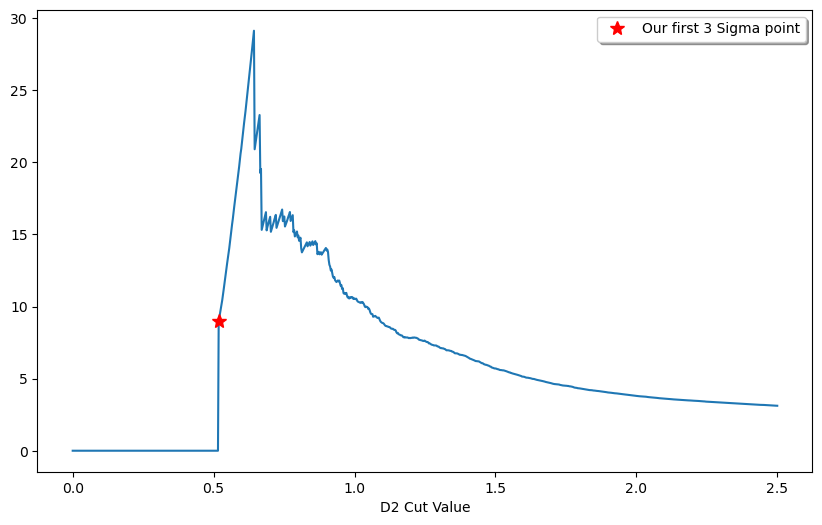

In [48]:
# TODO: Plot significance vs d2 cut value
# Mark the point where significance reaches 3σ

if max(significances) >= 3:
    sig_3_index = next(i for i, v in enumerate(significances) if v >= 3)
    sig_3_d2 = d2_scanvalues[sig_3_index]
    sig_3_value = significances[sig_3_index]
    print(f"3σ significance reached at d2 cut: {sig_3_d2:.3f} with significance: {sig_3_value:.3f}")

fig, ax11 = plt.subplots(figsize=(10, 6));  
ax11.plot(d2_scanvalues, significances);
ax11.set_xlabel('D2 Cut Value');
ax11.plot(sig_3_d2, sig_3_value, 'r*', markersize=10, label = 'Our first 3 Sigma point')
ax11.legend(shadow=True);



## Part (c): Final Results with Optimal Cuts

Apply both mass and optimal d2 cuts to visualize the final result.

In [49]:
# TODO: Identify optimal d2 cut value (e.g., for 3σ significance)
# TODO: Apply both mass [120, 130] and optimal d2 cuts

#Find the value of optimal d2 cut
optimal_d2idx= np.argmax(significances)
optimal_d2 = d2_scanvalues[optimal_d2idx]

higgs_optimal_cut = higgs_df[higgs_mask & (higgs_df['d2'] <= optimal_d2)]
qcd_optimal_cut = qcd_df[qcd_mask & (qcd_df['d2'] <= optimal_d2)]

# Calculate final significance
final_N_signal = higgs_optimal_cut['weight'].sum()
final_N_background = qcd_optimal_cut['weight'].sum()
final_significance = final_N_signal / np.sqrt(final_N_background)

print(f'Our optimal cut: {optimal_d2:.4f}')
print(f'Our final significance: {final_significance:.4f}')


Our optimal cut: 0.6431
Our final significance: 29.1293


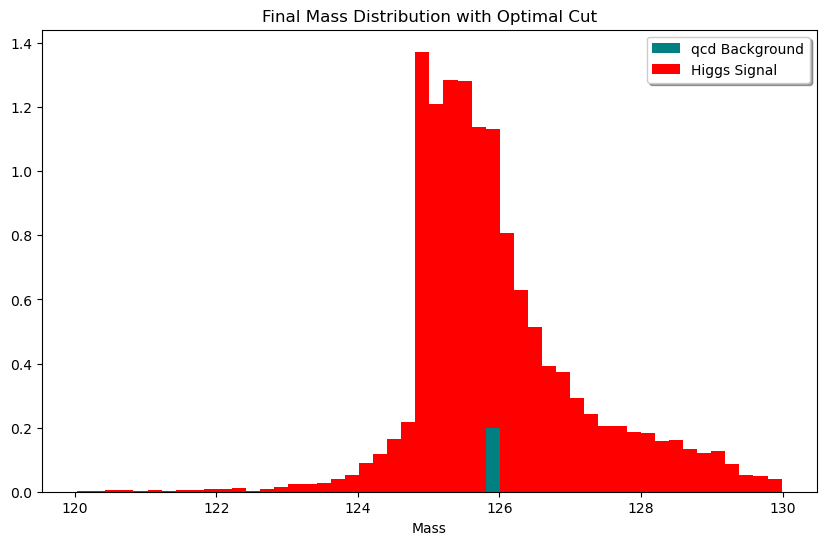

In [50]:
# TODO: Plot final mass distribution with both cuts applied
# Show signal stacked on background with optimal cuts

fig, ax12 = plt.subplots(figsize=(10, 6));
ax12.hist([qcd_optimal_cut['mass'], higgs_optimal_cut['mass']], bins=50, weights=[qcd_optimal_cut['weight'], higgs_optimal_cut['weight']], 
         label=['qcd Background', 'Higgs Signal'], color=['teal', 'red'], stacked=True);
ax12.legend(shadow=True);
ax12.set_xlabel('Mass')
ax12.set_ylabel('')
ax12.set_title('Final Mass Distribution with Optimal Cut');


**Question:** What do you observe in the final mass distribution? What is the final significance? How much improvement did you achieve?

**Your Answer:** We get almost only the Higgs Signal with no background noise, the final significance s ~29, we imporved by a drastic amount compared to the beginning.

# Bonus: High pT and Multi-Feature Optimization (3 points)

Optimize discovery significance for high pT data (`Sample_pt_1000_1200`) using at least 3 features.

In [51]:
# TODO: Load high pT data

In [52]:
# TODO: Explore available features

In [53]:
# TODO: Implement multi-feature optimization through for loops
# Consider combinations of mass, d2, and other jet substructure variables

# for ... :
    # for ... :
        # for ... :
            # if significance > best_significance:
            #     best_significance = significance
            #     best_cuts = {'mass_cut': mass_cut, 'd2_cut': d2_cut, 't21_cut': t21_cut}

In [54]:
# TODO: Plot final mass distribution with optimal cuts applied
# Show signal stacked on background with optimal cuts